In [1]:
import numpy as np
import scipy.stats as ss

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
scipy.stats
dist = ss.gamma
dist.fit()

In [2]:
def plot_(**kwargs):
    x = kwargs["x"]
    kwargs.pop("x")
    ax = kwargs["ax"]
    kwargs.pop("ax")
    dist = kwargs["dist"]
    kwargs.pop("dist")
    
    rv = dist(**kwargs)
    mean, var, skew, kurt = rv.stats(moments='mvsk')
    ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

    # Generate random numbers:
    r = rv.rvs(size=1000)

    # And compare the histogram:
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

    #loc, scale = ss.norm.fit(r)
    kwargs_f = dist.fit(r)
    mean_f, var_f, skew_f, kurt_f = dist(*kwargs_f).stats(moments='mvsk')
    ax.plot(x, 
            dist(*kwargs_f).pdf(x),
           'g-', 
            lw=7, 
            alpha=0.6, 
            label='fitted pdf')
    ax.set_title(f'frozen({kwargs}):\n    mean:{mean}, var:{var}\n'
                 f'sample: mean:{np.round(np.mean(r),1)}, var:{np.round(np.var(r),1)}\n'
                 f'fitted({np.round(kwargs_f,1)}):\n    mean:{np.round(mean_f,1)}, var:{np.round(var_f,1)}\n',
                 loc='left')
    ax.legend(loc='best', frameon=False)

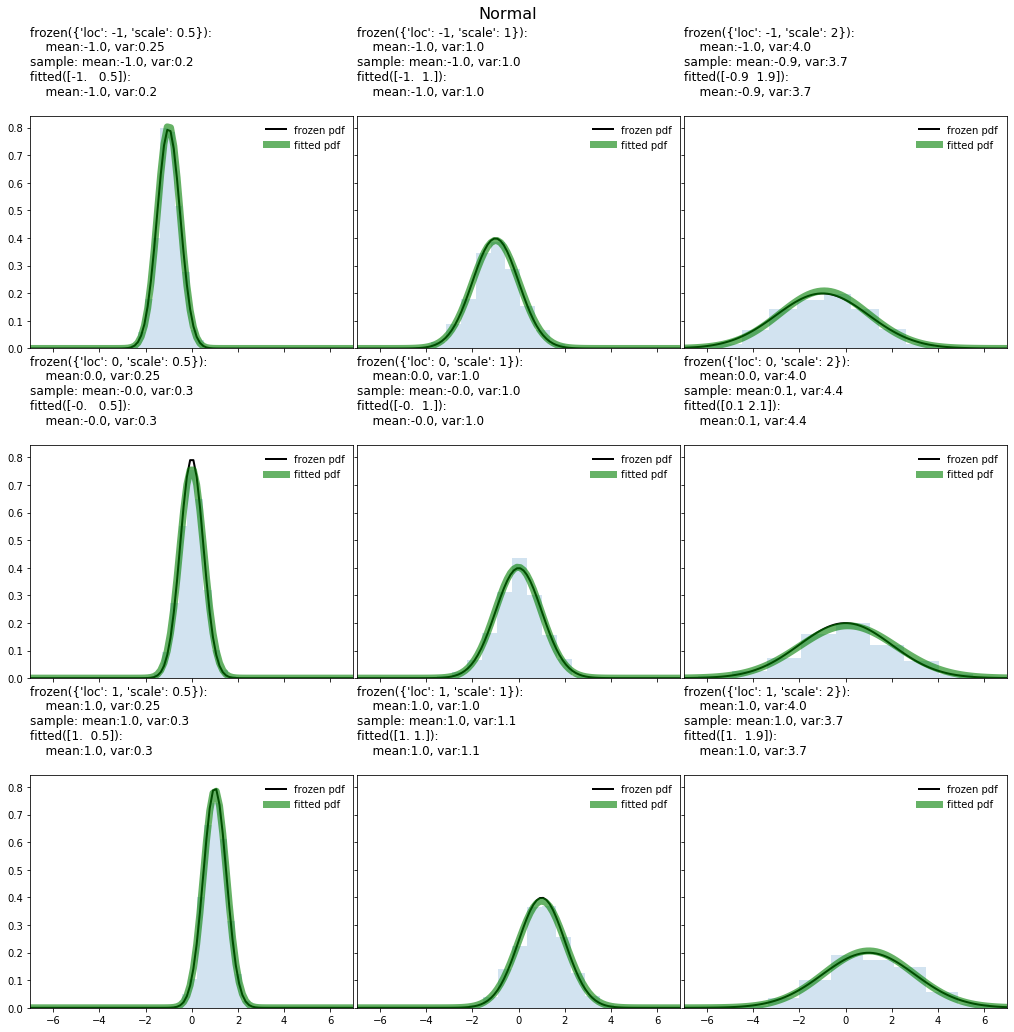

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(15,15), sharey=True, sharex=True)
x = np.linspace(-7,7, 100)
for indexes in [(0,0,-1,0.5),(1,0,0,0.5),(2,0,1,0.5),
                (0,1,-1,1),(1,1,0,1),(2,1,1,1),
                (0,2,-1,2),(1,2,0,2),(2,2,1,2),]:
    i_x,i_y,loc,scale = indexes
    plot_(x=x, ax=ax[i_x,i_y], dist=ss.norm, loc=loc, scale=scale)
ax[0,0].set_xlim(-7,7)
plt.tight_layout(pad=4.0, w_pad=0.0, h_pad=0.0)
fig.suptitle("Normal", fontsize=16)
plt.show()

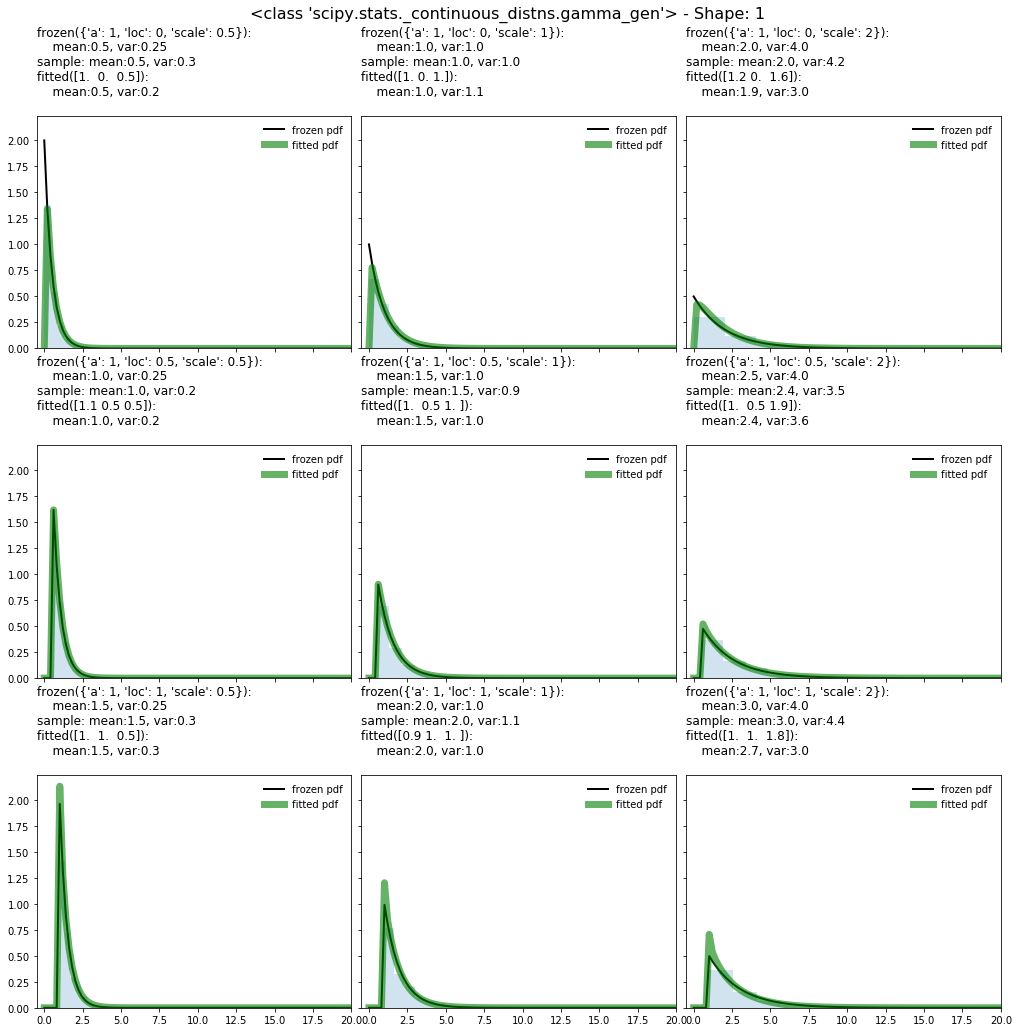

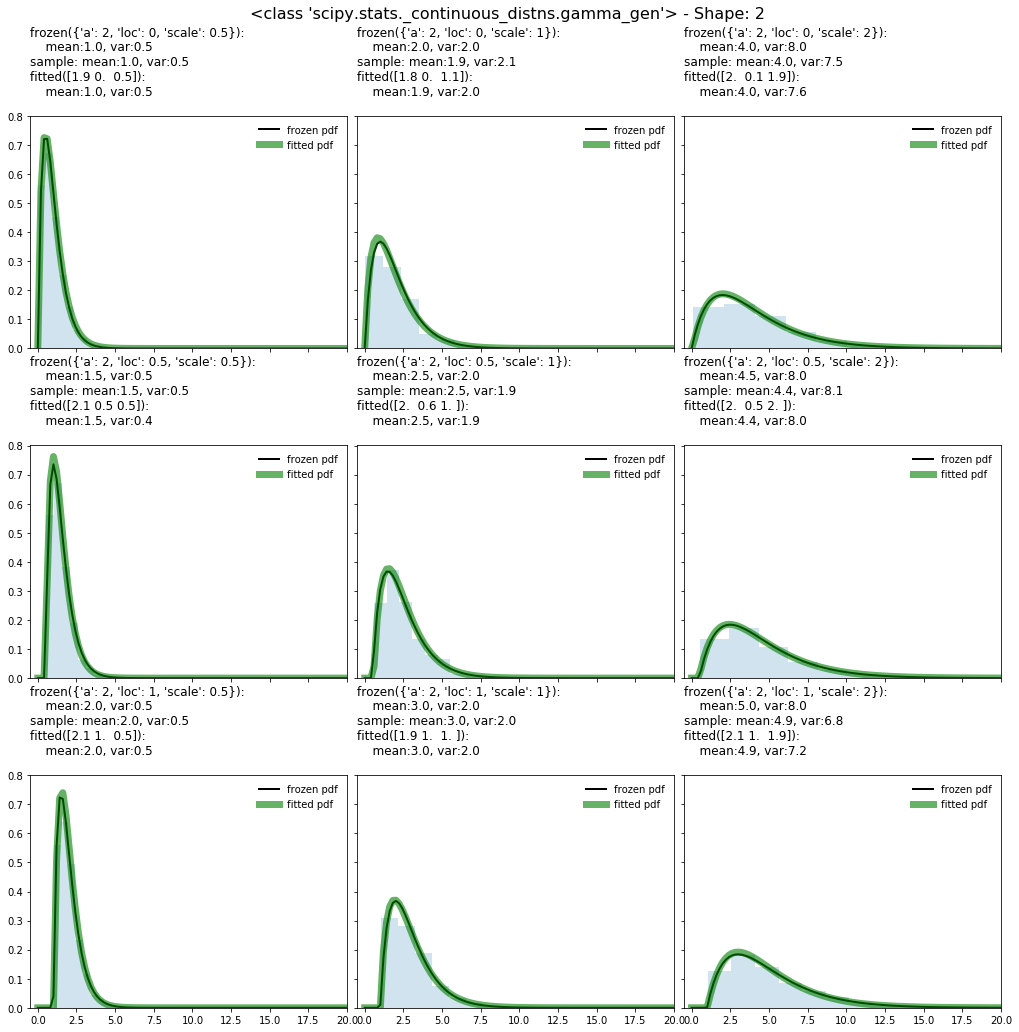

In [4]:
axis_x_min = -0.5
x_max = 20
args = {"x":np.linspace(0,x_max, 100),
        "dist":ss.gamma}
for shape in [1,2]:
    args.update({"a":shape})
    fig, ax = plt.subplots(3, 3, figsize=(15,15), sharey=True, sharex=True)
    for indexes in [(0,0,shape,0,0.5),(1,0,shape,0.5,0.5),(2,0,shape,1,0.5),
                    (0,1,shape,0,1),(1,1,shape,0.5,1),(2,1,shape,1,1),
                    (0,2,shape,0,2),(1,2,shape,0.5,2),(2,2,shape,1,2),]:
        i_x,i_y,shape, loc,scale = indexes
        args.update({"ax":ax[i_x,i_y], "loc":loc, "scale":scale})
        plot_(**args)
    ax[0,0].set_xlim(axis_x_min,x_max)
    plt.tight_layout(pad=4.0, w_pad=0.0, h_pad=0.0)
    dist_name = str(args["dist"].__class__)
    fig.suptitle(f'{dist_name} - Shape: {shape}', fontsize=16)
    plt.show()